In [371]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [372]:
web = 'https://fr.countryeconomy.com/pays/groupes/union-europeenne'

response = requests.get(web)
content = response.text
soup = BeautifulSoup(content, 'lxml')

In [373]:
exemple = soup.find('tr', class_ = 'tableheader')
exemple

<tr class="tableheader"><th>Pays</th><th title="Population">Population</th><th class="eur wdsp1_2" title="PIB annuel aux prix du marché">PIB annuel</th><th class="dol wdsp1_2" title="PIB annuel aux prix du marché">PIB annuel</th><th class="eur " title="PIB par habitant en euros">PIB par habitant</th><th class="dol " title="PIB par habitant en dollars">PIB par habitant</th><th title="Indice de développement humain">IDH</th><th class="eur wdsp1_2" title="Dette publique en millions d'euros">Dette totale (M. €)</th><th class="dol wdsp1_2" title="Dette publique en millions de dollars">Dette totale (M. $)</th><th title="Dette publique en pourcentage du PIB">Dette (%PIB)</th><th title="Déficit public en pourcentage du PIB">Déficit (%PIB)</th></tr>

In [374]:
title = []
for ex in exemple:
  title.append(ex.get_text())
print(title)

['Pays', 'Population', 'PIB annuel', 'PIB annuel', 'PIB par habitant', 'PIB par habitant', 'IDH', 'Dette totale (M. €)', 'Dette totale (M. $)', 'Dette (%PIB)', 'Déficit (%PIB)']


In [406]:
print(len(title))

11


In [375]:
for tr in soup.find_all('tr'):
  data = tr.find_all('td')
  print(data)

[]
[<td><a href="/pays/allemagne"><img class="flgTB" src="/img/flag/DEp.png"/>Allemagne [+]</a></td>, <td class="numero" data-value="83237124">83.237.124</td>, <td class="numero eur" data-value="3858300">3.858.300 M€</td>, <td class="numero dol" data-value="4062790">4.062.790 M$</td>, <td class="numero eur" data-value="46020">46.020 €</td>, <td class="numero dol" data-value="48810">48.810 $</td>, <td class="numero" data-value="0.942">0,942</td>, <td class="numero eur" data-value="2471628">2.471.628</td>, <td class="numero dol" data-value="2968690">2.968.690</td>, <td class="numero" data-value="68.6">68,60%</td>, <td class="numero" data-value="-3.7">-3,70%</td>]
[<td><a href="/pays/autriche"><img class="flgTB" src="/img/flag/ATp.png"/>Autriche [+]</a></td>, <td class="numero" data-value="8978929">8.978.929</td>, <td class="numero eur" data-value="406149">406.149 M€</td>, <td class="numero dol" data-value="477084">477.084 M$</td>, <td class="numero eur" data-value="45370">45.370 €</td>, 

In [494]:
df = pd.DataFrame()

for row in soup.find_all('tr'):
  row_text = [x.text for x in row.find_all('td')]
  frame = pd.DataFrame(row_text).T
  df = df.append(frame)


In [495]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,Allemagne [+],83.237.124,3.858.300 M€,4.062.790 M$,46.020 €,48.810 $,"0,942",2.471.628,2.968.690,"68,60%","-3,70%"
0,Autriche [+],8.978.929,406.149 M€,477.084 M$,45.370 €,53.332 $,"0,916",334.162,395.214,"82,30%","-5,90%"
0,Belgique [+],11.631.136,502.312 M€,599.107 M$,43.330 €,51.849 $,"0,937",548.488,649.405,"109,20%","-5,60%"
0,Bulgarie [+],6.838.937,71.077 M€,80.327 M$,10.330 €,11.746 $,"0,795",17.010,19.143,"23,90%","-3,90%"
0,Chypre [+],904.705,24.019 M€,27.738 M$,26.680 €,30.957 $,"0,896",24.271,28.725,"101,00%","-1,70%"
0,Croatie [+],3.879.074,58.254 M€,67.707 M$,14.720 €,17.454 $,"0,858",45.743,54.026,"78,40%","-2,60%"
0,Danemark [+],5.873.420,336.719 M€,398.303 M$,57.520 €,68.202 $,"0,948",123.315,145.899,"36,60%","3,60%"
0,Espagne [+],47.615.034,1.328.922 M€,1.399.355 M$,27.910 €,29.389 $,"0,905",1.427.238,1.690.788,"118,30%","-6,87%"
0,Estonie [+],1.331.796,31.445 M€,37.216 M$,23.640 €,27.962 $,"0,890",5.534,6.551,"17,60%","-2,40%"
0,Finlande [+],5.548.241,251.520 M€,297.575 M$,45.390 €,53.774 $,"0,940",181.920,196.952,"72,40%","-2,80%"


In [496]:
df.columns = title

In [497]:
df = df.reset_index().drop('index', axis = 1).drop(27, axis = 0)

In [498]:
df.tail()

,Pays,Population,PIB annuel,PIB annuel,PIB par habitant,PIB par habitant,IDH,Dette totale (M. €),Dette totale (M. $),Dette (%PIB),Déficit (%PIB)
22,Roumanie [+],19.038.098,241.268 M€,284.086 M$,12.620 €,14.795 $,"0,821",116.695,145.994,"48,90%","-7,10%"
23,Slovaquie [+],5.434.712,98.523 M€,114.947 M$,18.110 €,21.053 $,"0,848",61.267,72.501,"62,20%","-5,50%"
24,Slovénie [+],2.107.180,52.208 M€,61.790 M$,24.770 €,29.298 $,"0,918",38.877,45.990,"74,50%","-4,70%"
25,Suède [+],10.452.326,537.085 M€,635.664 M$,51.560 €,60.816 $,"0,947",193.253,228.560,"36,30%","-0,10%"
26,Tchéquie [+],10.516.707,238.250 M€,281.778 M$,22.270 €,26.849 $,"0,889",103.260,118.395,"42,00%","-5,10%"


In [499]:
df['Pays'] = df['Pays'].str[:-4]

In [500]:
df.columns = ['Pays', 'Population', 'PIB_euro', 'PIB_dollar', 'PIB_hab_euro', 'PIB_hab_dollar', 'IDH', 'Dette_total_euro', 'Dette_total_dollar', 'Dette_p_PIB', 'Deficit_p_PIB']

In [501]:
df.tail()

,Pays,Population,PIB_euro,PIB_dollar,PIB_hab_euro,PIB_hab_dollar,IDH,Dette_total_euro,Dette_total_dollar,Dette_p_PIB,Deficit_p_PIB
22,Roumanie,19.038.098,241.268 M€,284.086 M$,12.620 €,14.795 $,"0,821",116.695,145.994,"48,90%","-7,10%"
23,Slovaquie,5.434.712,98.523 M€,114.947 M$,18.110 €,21.053 $,"0,848",61.267,72.501,"62,20%","-5,50%"
24,Slovénie,2.107.180,52.208 M€,61.790 M$,24.770 €,29.298 $,"0,918",38.877,45.990,"74,50%","-4,70%"
25,Suède,10.452.326,537.085 M€,635.664 M$,51.560 €,60.816 $,"0,947",193.253,228.560,"36,30%","-0,10%"
26,Tchéquie,10.516.707,238.250 M€,281.778 M$,22.270 €,26.849 $,"0,889",103.260,118.395,"42,00%","-5,10%"


In [502]:
df['PIB_euro'] =  df['PIB_euro'].str[:-3]
df['PIB_dollar'] =  df['PIB_dollar'].str[:-3]
df['PIB_hab_euro'] =  df['PIB_hab_euro'].str[:-2]
df['PIB_hab_dollar'] =  df['PIB_hab_dollar'].str[:-2]
df['Dette_p_PIB'] =  df['Dette_p_PIB'].str[:-1]
df['Deficit_p_PIB'] =  df['Deficit_p_PIB'].str[:-1]

In [503]:
df.tail()

,Pays,Population,PIB_euro,PIB_dollar,PIB_hab_euro,PIB_hab_dollar,IDH,Dette_total_euro,Dette_total_dollar,Dette_p_PIB,Deficit_p_PIB
22,Roumanie,19.038.098,241.268,284.086,12.620,14.795,"0,821",116.695,145.994,"48,90","-7,10"
23,Slovaquie,5.434.712,98.523,114.947,18.110,21.053,"0,848",61.267,72.501,"62,20","-5,50"
24,Slovénie,2.107.180,52.208,61.790,24.770,29.298,"0,918",38.877,45.990,"74,50","-4,70"
25,Suède,10.452.326,537.085,635.664,51.560,60.816,"0,947",193.253,228.560,"36,30","-0,10"
26,Tchéquie,10.516.707,238.250,281.778,22.270,26.849,"0,889",103.260,118.395,"42,00","-5,10"


In [504]:
df = df.apply(lambda x: x.str.replace('.', ''))

<ipython-input-504-00373318af4c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df = df.apply(lambda x: x.str.replace('.', ''))


In [505]:
df = df.apply(lambda x: x.str.replace(',', '.'))

In [506]:
df.tail()

,Pays,Population,PIB_euro,PIB_dollar,PIB_hab_euro,PIB_hab_dollar,IDH,Dette_total_euro,Dette_total_dollar,Dette_p_PIB,Deficit_p_PIB
22,Roumanie,19038098,241268,284086,12620,14795,0.821,116695,145994,48.90,-7.10
23,Slovaquie,5434712,98523,114947,18110,21053,0.848,61267,72501,62.20,-5.50
24,Slovénie,2107180,52208,61790,24770,29298,0.918,38877,45990,74.50,-4.70
25,Suède,10452326,537085,635664,51560,60816,0.947,193253,228560,36.30,-0.10
26,Tchéquie,10516707,238250,281778,22270,26849,0.889,103260,118395,42.00,-5.10


In [508]:
df = df.astype({"Pays": str,
                "Population": int,
                "PIB_euro": int,
                "PIB_dollar": int,
                "PIB_hab_euro": int,
                "PIB_hab_dollar": int,
                "IDH": float,
                "Dette_total_euro": int,
                "Dette_total_dollar": int,
                "Dette_p_PIB": float,
                "Deficit_p_PIB": float})

In [510]:
df.tail()

,Pays,Population,PIB_euro,PIB_dollar,PIB_hab_euro,PIB_hab_dollar,IDH,Dette_total_euro,Dette_total_dollar,Dette_p_PIB,Deficit_p_PIB
22,Roumanie,19038098,241268,284086,12620,14795,0.821,116695,145994,48.9,-7.1
23,Slovaquie,5434712,98523,114947,18110,21053,0.848,61267,72501,62.2,-5.5
24,Slovénie,2107180,52208,61790,24770,29298,0.918,38877,45990,74.5,-4.7
25,Suède,10452326,537085,635664,51560,60816,0.947,193253,228560,36.3,-0.1
26,Tchéquie,10516707,238250,281778,22270,26849,0.889,103260,118395,42.0,-5.1


In [527]:
df['Pays'].unique()

array(['Allemagne', 'Autriche', 'Belgique', 'Bulgarie', 'Chypre',
       'Croatie', 'Danemark', 'Espagne', 'Estonie', 'Finlande', 'France',
       'Grèce', 'Hongrie', 'Irlande', 'Italie', 'Lettonie', 'Lituanie',
       'Luxembourg', 'Malte', 'Pays-Bas', 'Pologne', 'Portugal',
       'Roumanie', 'Slovaquie', 'Slovénie', 'Suède', 'Tchéquie'],
      dtype=object)

In [541]:
import matplotlib.pyplot as plt
import numpy as np


my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

#plt.bar(x, y, color=my_cmap(rescale(y)))

df= df.sort_values('Population')

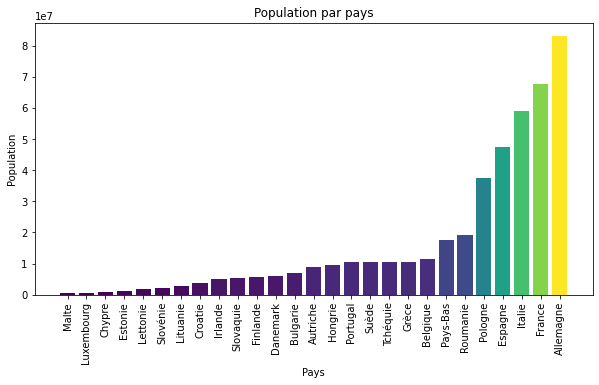

In [543]:
plt.figure(figsize=(10, 5))
plt.bar(df['Pays'], df['Population'], color=my_cmap(rescale(df['Population'])))
plt.xlabel('Pays')
plt.ylabel('Population')
plt.title('Population par pays')
plt.xticks(rotation = 90)
plt.show()